<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea%206/%20Parte%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
from collections import Counter
import math
import random

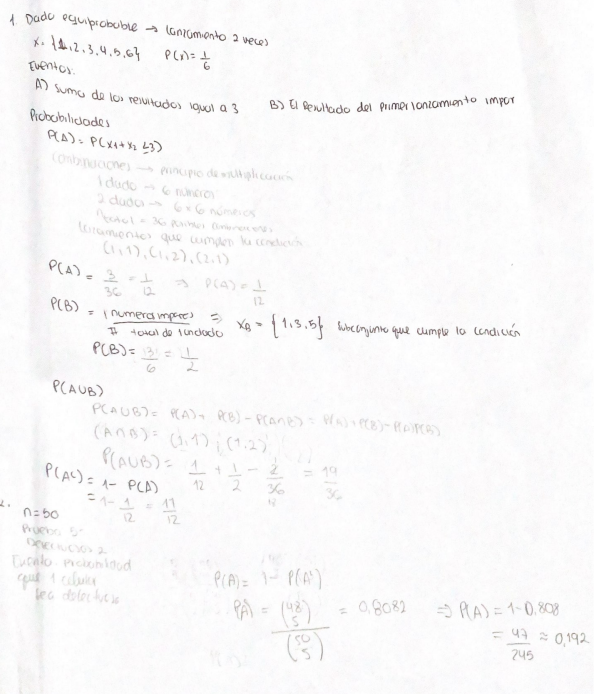

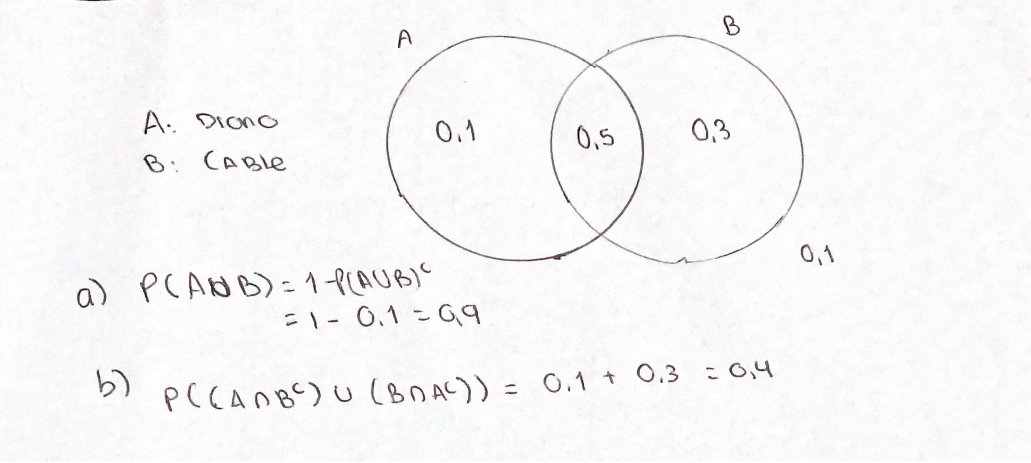

Cumpleaños

In [44]:
def GetProbB(n):
    if n <= 365:
        prob = 1.0
        for i in range(1,n):
            prob *= (365 - i)/365
        return prob
    else:
        return 0

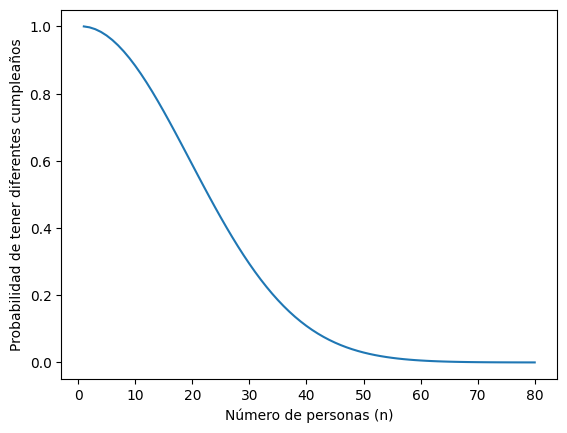

In [45]:
ni = np.arange(1, 81)
probabilidades = [GetProbB(n) for n in ni]
plt.plot(ni,probabilidades)
plt.xlabel('Número de personas (n)')
plt.ylabel('Probabilidad de tener diferentes cumpleaños')
plt.show()


Se lanzan dos dados equi-probables y se observan los siguientes eventos:


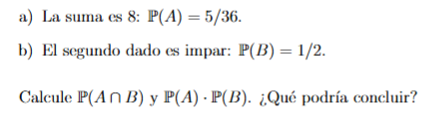

In [46]:
S = 6*6
#a) X1 + x2 = 8
H = [(2,6),(6,2),(3,5),(5,3),(4,4)]
Favorable = len(H)
Pa = Favorable/S
print(Pa)
#b) Dado 2 impar
T = 3*6
Pb = T/S
print(Pb)

0.1388888888888889
0.5


In [47]:
#Probabilidad de que en el lanzamiento la suma sea igual a 8 y el segundo dado sea impar
H =  [(3,5),(5,3)]
P = len(H)/S
print(P)
# Multiplicación de la probabilidad del evento a y b
P = Pa * Pb
print(P)

0.05555555555555555
0.06944444444444445


Dado que P(A∩B) ≠ P(A)*P(B), los eventos no son independientes.

Se lanza simult ́aneamente 3 dados de 6 caras.  ¿Cu ́al es la probabilidad de obtener 1 par?P(A) = 5/12.  Realice el c ́alculo de esta probabilidad usando un experimento virtual conN= 105eventos.

In [48]:
#Dado

def GetProb3Dados(N):
    pares = 0
    for i in range(N):
        dados = [random.randint(1, 6) for i in range(3)]
        dados.sort()
        if dados[0] == dados[1] != dados[2] or dados[1] == dados[2] != dados[0]:
            pares += 1
    return pares / N

In [56]:
probPar = GetProb3Dados(10**5)
print("Probabilidad de obtener un par:", probPar)

Probabilidad de obtener un par: 0.41856


 Se lanza simult ́aneamente 5 dados de 6 caras.  ¿Cu ́al es la probabilidad de obtenter?

In [69]:
from typing import Counter
#1 par y doble par
def GetProb5Dados(N):
    pares = 0
    dpares = 0
    ciguales = 0
    for i in range(N):
        dados = Counter(random.randint(1, 6) for i in range(5)).values()
        pares += sum(j == 2 for j in dados) == 1
        dpares += sum(j == 2 for j in dados) == 2
        ciguales += sum(j == 4 for j in dados) == 1
    return pares / N, dpares / N, ciguales / N

probPar, probDobles, probcuatro = GetProb5Dados(10**5)
print("Probabilidad de obtener un par:", probPar)
print("Probabilidad de obtener un doble par:", probDobles)
print("Probabilidad de obtener 4 en la misma cara:", probcuatro)


Probabilidad de obtener un par: 0.50182
Probabilidad de obtener un doble par: 0.23367
Probabilidad de obtener 4 en la misma cara: 0.01878


HIDDEN MARKOV MODELS

In [50]:
States = np.array([0,1]) # J,B
Prior = np.array([0.8,0.2])
Obs = np.array([1,0,0,0,1,0,1,0])
DictH= {0:'J',1:'B'}
DictO = {0:'Cara',1:'Sello'}

In [51]:
T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1]])
print(E)
n = len(Obs)

[[0.5 0.9]
 [0.5 0.1]]


In [52]:
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))
    Permu = []
    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

In [53]:
HS = GetStates(States,n)
HS

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [54]:
def GetProb(T,E,Obs,State,Prior):
  n = len(Obs)
  p = 1.
  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[State[i+1], State[i]]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

In [55]:
P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
ii = np.where(P == np.max(P))
print(HiddenStates[ii], P[ii])

P

NameError: name 'HiddenStates' is not defined

In [ ]:
np.sum(P)